In [7]:
import sys
sys.path.append("..")  # Ensure ml/ is in the path

import numpy as np
import pandas as pd
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.plots import plot_convergence, plot_objective
from ml.simulation import simulate_draft, load_default_weights
from ml.weights import unpack_weights, college_features, noncollege_features

In [2]:
# Search spaces for both college and non-college weights
college_dim = len(college_features) * 3
noncollege_dim = len(noncollege_features) * 3

college_space = [Real(0.0, 1.0, name=f'cw{i}') for i in range(college_dim)]
noncollege_space = [Real(0.0, 1.0, name=f'ncw{i}') for i in range(noncollege_dim)]

# Combine
search_space = college_space + noncollege_space

In [3]:
@use_named_args(college_space)
def college_objective(**params):
    college_array = np.array([params[f'cw{i}'] for i in range(college_dim)])
    college_w = unpack_weights(college_array, is_college=True)

    # Load default non-college weights
    _, noncollege_w = load_default_weights()

    sim_df, accuracy, _ = simulate_draft(
        year=2024,
        composite_weight=0.2,
        plot_distribution=False,
        college_weights=college_w,
        noncollege_weights=noncollege_w
    )
    return -accuracy

@use_named_args(noncollege_space)
def noncollege_objective(**params):
    noncollege_array = np.array([params[f'ncw{i}'] for i in range(noncollege_dim)])
    noncollege_w = unpack_weights(noncollege_array, is_college=False)

    # Load default college weights
    college_w, _ = load_default_weights()

    sim_df, accuracy, _ = simulate_draft(
        year=2024,
        composite_weight=0.2,
        plot_distribution=False,
        college_weights=college_w,
        noncollege_weights=noncollege_w
    )
    return -accuracy

In [4]:
college_result = gp_minimize(
    func=college_objective,
    dimensions=college_space,
    n_calls=30,
    random_state=42,
    verbose=True
)

noncollege_result = gp_minimize(
    func=noncollege_objective,
    dimensions=noncollege_space,
    n_calls=30,
    random_state=42,
    verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
✅ Draft Accuracy (Team Match): 0.00%
🎯 Lottery Hit Rate: 14.29%
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1010
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 2 started. Evaluating function at random point.
✅ Draft Accuracy (Team Match): 0.00%
🎯 Lottery Hit Rate: 14.29%
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0685
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 3 started. Evaluating function at random point.
✅ Draft Accuracy (Team Match): 0.00%
🎯 Lottery Hit Rate: 14.29%
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0698
Function value obtained: -0.0000
Current minimum: -0.0000
Iteration No: 4 started. Evaluating function at random point.
✅ Draft Accuracy (Team Match): 0.00%
🎯 Lottery Hit Rate: 14.29%
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0694
Function value obtaine

In [5]:
# Save best weights to .npy files
np.save("best_college_weights.npy", college_result.x)
np.save("best_noncollege_weights.npy", noncollege_result.x)

print("✅ Saved best weights to disk.")

✅ Saved best weights to disk.


📈 College Weight Convergence


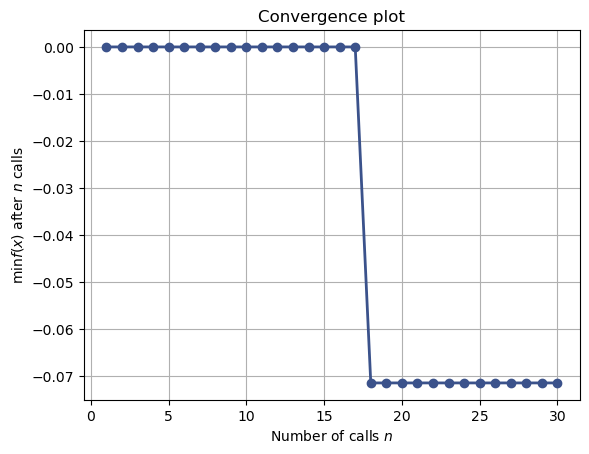

📈 Non-College Weight Convergence


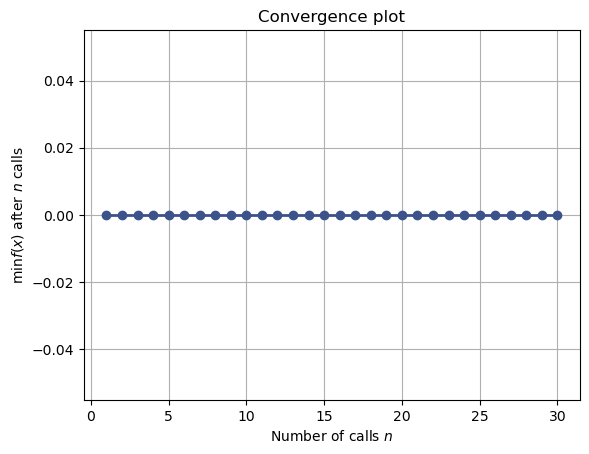

In [6]:
# --- Convergence Plots ---
import matplotlib.pyplot as plt

print("📈 College Weight Convergence")
plot_convergence(college_result)
plt.show()

print("📈 Non-College Weight Convergence")
plot_convergence(noncollege_result)
plt.show()

In [ ]:
# TESTING TESTING 2024
simulate_draft(2024)